# Project: Investigate a TMDB Dataset!

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In this project we will execute the following points:

1. Profit by genre
2. Earnings over time of the film industry
3. Profit by decade and genre proportion




<a id='intro'></a>
## Introduction

> In this project, we will review some interest points founded in the TMDB Dataset. But first, we will install all the necessary packages to read and analyze all the data appropriately

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> The next step consists in load the data downloaded previously in https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv

### General Properties

In [193]:
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')


> First of all, We will explore the data in both datasets that I call "credits" and "movies", respectively...

In [194]:
#Credits
credits.head()


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [195]:
#Movies
movies.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


> Now, that We know the data, We will focus only in "movies" dataset. So we can continue the exploration. The next step is to know the shape (How many columns and rows have our dataframe)

In [196]:
movies.shape

(4803, 20)

> This dataframe consists of 20 columns and 4803 rows. But this is not enough, because We want to know each variable, so We will try with "info" function

> You can see that most of them have 4803 records, as indicated by the "shape" parameter. However, we can see
that other variables such as "homepage", "release_date", "runtime" and "tagline" have fewer records, for which it should
doing deeper work to investigate what the problem is and how to fix it.


In [197]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

> With the last function, it shows that almost all the variables have 4803 registers, but the variables like "homepage","release_date", "runtime" and "tagline" have less of them. So We will explore further to get with this missing data.
>
> Fortunately, since we will only investigate a part of the data, only the variable "release_date" will remain with missing data.

In [198]:
columns = ['id', 'title', 'release_date','budget', 'revenue', 'genres']

movies2 = movies[columns]
movies2.head()

,id,title,release_date,budget,revenue,genres
0,19995,Avatar,2009-12-10,237000000,2787965087,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,285,Pirates of the Caribbean: At World's End,2007-05-19,300000000,961000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,206647,Spectre,2015-10-26,245000000,880674609,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,49026,The Dark Knight Rises,2012-07-16,250000000,1084939099,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,49529,John Carter,2012-03-07,260000000,284139100,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


> Once We have the definitive dataframe, we can continue to inquire about what kind of variables are those that make up this.
>
> The info function is used again, but with the new dataframe  




In [199]:
movies2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 6 columns):
id              4803 non-null int64
title           4803 non-null object
release_date    4802 non-null object
budget          4803 non-null int64
revenue         4803 non-null int64
genres          4803 non-null object
dtypes: int64(3), object(3)
memory usage: 225.3+ KB


> This will show us that we have 6 variables and 3 of them are int64 type (id, budget and revenue) and the other three are object type (release_date, title and genres)
>
> Now it is time to investigate what type of variable is each one of them. Since they are few, we will see them all.


In [200]:
type(movies2['id'][0])

numpy.int64

In [201]:
type(movies2['title'][0])

str

In [202]:
type(movies2['release_date'][0])

str

In [203]:
type(movies2['budget'][0])

numpy.int64

In [204]:
type(movies2['revenue'][0])

numpy.int64

In [205]:
type(movies2['genres'][0])

str

> With this, we check that all object type variables are string type.  

> What follows is to identify columns and rows that meet missing values, as it appears to have release_date. Anyway, it will be verified that the other variables do not have missing variables either.

In [206]:
# count null columns
null_col=movies2.columns[movies2.isnull().any()]
movies2[null_col].isnull().sum()

release_date    1
dtype: int64

> The result of this indicates that only release_date has one data as missing.
>
>Since we know that there is only one missing value in release_date, we will find out which row it is in.

In [207]:
print(movies2[movies2['release_date'].isnull()][null_col])

     release_date
4553          NaN


> Given the previous exercise, we know that record 4553 is the one with the missing value for release date, so we will see what else this row contains


In [208]:
print(movies2.iloc[4553, :])

id                                  380097
title           America Is Still the Place
release_date                           NaN
budget                                   0
revenue                                  0
genres                                  []
Name: 4553, dtype: object


> Wow, we found that this movie called "AmericaIs Still the Place" has 0 budget, revenue and no genre ... weird, right?
>
>This makes me wonder how the variables will behave. We will see some basic statistics to decipher them.

In [209]:
movies2.describe().round()

,id,budget,revenue
count,4803.0,4803.0,4.803000e+03
mean,57165.0,29045040.0,8.226064e+07
std,88695.0,40722391.0,1.628571e+08
min,5.0,0.0,0.000000e+00
25%,9014.0,790000.0,0.000000e+00
50%,14629.0,15000000.0,1.917000e+07
75%,58610.0,40000000.0,9.291719e+07
max,459488.0,380000000.0,2.787965e+09


> With this, we see that for both variables, the minimum is 0, but what is most striking is that within revenue there is
at least 25% of movies with 0 revenue ... must have been very bad, right? LOL
>
> Therefore, we will investigate which ones and how many they are, both for budget and for revenue.

In [210]:
#To select rows whose budget value equals to 0
miss_budget = movies2.budget == 0
# number of rows whose budget value equals to 0
print(miss_budget.sum())

1037


> We have discovered that 1037 movies have a budget equal to zero.
>
>Let's do the same with revenue

In [211]:
#To select rows whose budget value equals to 0
rev = movies2.revenue == 0
# number of rows whose budget value equals to 0
print(rev.sum())

1427


> Let's check if there is duplicate data

In [212]:
# count of duplicated data
sum(movies2.duplicated())

0

> Great! there is no duplicate data ... that means we can proceed to the next step: data cleaning

### Data Cleaning 

> In this section, We will clean the data from missing values 
>
> The first thing to do is remove the missing value found in the variable "release_date" As it is already known that the row that contains it is 4553, we will only apply a drop to it to make it disappear!

In [213]:
# drop row with missing release_date value
movies2.drop([4553], axis=0, inplace=True)

> Again, we will see the basic statistics of the numerical variables that we have. 


In [214]:
# this returns useful descriptive statistics for each column of data
movies2.describe().round()

,id,budget,revenue
count,4802.0,4802.0,4.802000e+03
mean,57098.0,29051088.0,8.227777e+07
std,88581.0,40724474.0,1.628697e+08
min,5.0,0.0,0.000000e+00
25%,9014.0,800000.0,0.000000e+00
50%,14626.0,15000000.0,1.917498e+07
75%,58590.0,40000000.0,9.291920e+07
max,459488.0,380000000.0,2.787965e+09


> As we have seen previously, we are going to treat the data that has 0 in budget and in revenue. But we will not eliminate them, we will replace it with the average of each variable.

In [215]:
# budget mean
budget_mean = round(movies2['budget'].mean())
print(budget_mean)

# revenue mean
revenue_mean = round(movies2['revenue'].mean())
print(revenue_mean)

29051088
82277769


In [216]:
# replace budget values of 0 with the budget mean by masking
movies2['budget'] = movies2.budget.mask(movies2.budget == 0,budget_mean)

# check to see if there are rows whose budget value equals a 0
movies2.loc[movies2['budget'] == 0]

# replace revenue values of 0 with the revenue mean by masking
movies2['revenue'] = movies2.revenue.mask(movies2.revenue == 0,revenue_mean)

# check to see if there are rows whose budget value equals a 0
movies2.loc[movies2['revenue'] == 0]

C:\Users\camil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\camil\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,title,release_date,budget,revenue,genres


> We will change the type from release_date to datetime


In [217]:
# change to datetime datatype
movies2['release_date'] = pd.to_datetime(movies2['release_date'])

# cross check the datatype to ensure that the change was correctly implemented
type(movies2['release_date'][0])

C:\Users\camil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


pandas._libs.tslibs.timestamps.Timestamp

> Now, we will extract every genre from the "genre" variable, that contains a list with dictionaries, which are not useful for our analysis

In [218]:
with open('movies3.csv', 'w', encoding='utf-8') as f:
    f.write('id;title;release_date;budget;revenue;genre\n')
    for i, row in enumerate(movies2['genres']):
        nl = '\n'
        try:
            genres = eval(row)
        except:
            genres = [{'name':row}]
        for o in genres:
            try:
                f.write(f"{movies2['id'][i]};{movies2['title'][i]};{movies2['release_date'][i].strftime('%Y-%m-%d')};{movies2['budget'][i]};{movies2['revenue'][i]};{o.get('name')}{nl}")
            except:
                pass

> And then, for simplicity, we will create a new dataframe, called "mov3"

In [219]:
mov3 = pd.read_csv('movies3.csv', encoding='utf-8',delimiter=";")
mov3.head()


,id,title,release_date,budget,revenue,genre
0,19995,Avatar,2009-12-10,237000000,2787965087,Action
1,19995,Avatar,2009-12-10,237000000,2787965087,Adventure
2,19995,Avatar,2009-12-10,237000000,2787965087,Fantasy
3,19995,Avatar,2009-12-10,237000000,2787965087,Science Fiction
4,285,Pirates of the Caribbean: At World's End,2007-05-19,300000000,961000000,Adventure


> The "id" variable, we will consider it as a integer

In [220]:
mov3['id'] = mov3['id'].astype(int)

> Once you have the genres separated by rows, we can continue with the analysis to be developed:

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned our data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.

### 1. Profit by genre


> To obtain the profit, the "profit" indicator must first be built, which will be as follows:

In [221]:
mov3['profit'] = mov3['revenue']-mov3['budget']
mov3.head()

,id,title,release_date,budget,revenue,genre,profit
0,19995,Avatar,2009-12-10,237000000,2787965087,Action,2550965087
1,19995,Avatar,2009-12-10,237000000,2787965087,Adventure,2550965087
2,19995,Avatar,2009-12-10,237000000,2787965087,Fantasy,2550965087
3,19995,Avatar,2009-12-10,237000000,2787965087,Science Fiction,2550965087
4,285,Pirates of the Caribbean: At World's End,2007-05-19,300000000,961000000,Adventure,661000000


> On the other hand, we can also obtain the profit ratio with respect to our budget, which could be more representative since it would indicate how many times the "invested" was earned

In [222]:
profit_ratio = mov3['profit']/mov3['budget']
mov3['profit_ratio']  =profit_ratio
mov3.describe()

,id,budget,revenue,profit,profit_ratio
count,12157.000000,1.215700e+04,1.215700e+04,1.215700e+04,1.215700e+04
mean,51737.788270,3.944229e+07,1.177068e+08,7.826455e+07,1.066892e+05
std,83695.037431,4.127188e+07,1.711673e+08,1.453061e+08,2.758842e+06
min,5.000000,1.000000e+00,5.000000e+00,-1.657101e+08,-9.999997e-01
25%,8698.000000,1.400000e+07,2.970000e+07,5.654912e+06,3.286651e-01
50%,13569.000000,2.905109e+07,8.227777e+07,5.322668e+07,1.832175e+00
75%,49530.000000,5.000000e+07,1.074588e+08,7.827777e+07,3.226691e+00
max,459488.000000,3.800000e+08,2.787965e+09,2.550965e+09,8.227777e+07


> After this, we can associate how much was earned by type of gender, using the variable "genre" and "profit_ratio"
But first, it will be analyzed how many genres exist and how many of each are in the constructed dataframe.

In [223]:
mov3['genre'].value_counts()

Drama              2297
Comedy             1722
Thriller           1273
Action             1153
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             347
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
Name: genre, dtype: int64

> On the other hand, we can have another view of these genres, creating a bar chart

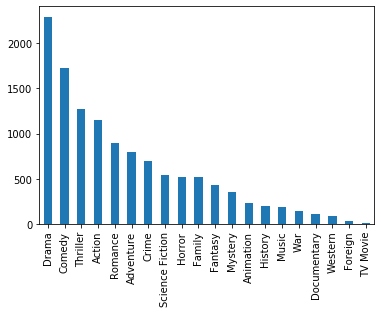

In [224]:
mov3['genre'].value_counts().plot(kind="bar");

> Now we will see which are the movies that have a higher median index in a descending way,
From what you can see that the top 3 most "profitable" films are the TV Movie, Animation and Comedy

In [225]:
profgen_m = mov3.groupby(['genre'], as_index=False)['profit_ratio'].median().sort_values(by='profit_ratio', ascending=False)
profgen_m

,genre,profit_ratio
16,TV Movie,10.211060
2,Animation,1.832175
3,Comedy,1.832175
5,Documentary,1.832175
6,Drama,1.832175
7,Family,1.832175
17,Thriller,1.832175
9,Foreign,1.832175
11,Horror,1.832175
12,Music,1.832175


###  2. Earnings over time of the film industry

> In this second part, we will see how earnings in the film industry have evolved over time, with the detail of grouping the information regarding its release date and what decade it corresponds to.
> 
> The first thing to do, is set the index to use (release_date variable) as a datetime using a function. 

In [227]:
mov3['release_date'] = pd.to_datetime(mov3['release_date'])
mov3.set_index('release_date', inplace=True)

DatetimeIndex(['2009-12-10', '2009-12-10', '2009-12-10', '2009-12-10',
               '2007-05-19', '2007-05-19', '2007-05-19', '2015-10-26',
               '2015-10-26', '2015-10-26',
               ...
               '2005-03-12', '2005-03-12', '2005-03-12', '1992-09-04',
               '1992-09-04', '2011-12-26', '2011-12-26', '2011-12-26',
               '2011-12-26', '2012-05-03'],
              dtype='datetime64[ns]', name='release_date', length=12157, freq=None)


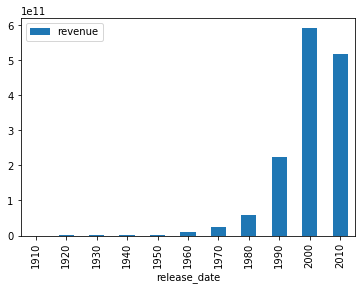

In [233]:
print(mov3.index)
mov3.describe()

mov3.groupby((mov3.index.year//10)*10).sum().plot(y='revenue', kind = 'bar');

###  3. Profit by decade and genre proportion

> In this third part, what we will see is how each part of the earnings per decade is broken down by type of gender

                    Action     Adventure       Fantasy  Science Fiction  \
release_date                                                              
1910          0.000000e+00  0.000000e+00  0.000000e+00     0.000000e+00   
1920          0.000000e+00  0.000000e+00  0.000000e+00     6.504220e+05   
1930          1.073600e+07  1.187687e+08  2.186805e+08     0.000000e+00   
1940          1.723555e+08  9.172000e+06  9.192189e+07     8.227777e+07   
1950          5.827184e+07  4.360000e+07  0.000000e+00     3.320000e+07   
1960          8.783913e+08  9.626910e+08  1.022727e+08     1.812924e+08   
1970          2.757809e+09  3.387454e+09  3.560162e+08     2.717039e+09   
1980          8.907305e+09  9.048578e+09  3.083949e+09     5.128124e+09   
1990          2.451405e+10  2.012511e+10  9.683659e+09     1.167812e+10   
2000          6.832665e+10  6.686243e+10  4.052975e+10     2.930984e+10   
2010          7.498663e+10  7.366869e+10  3.403642e+10     4.078284e+10   

                     Cri

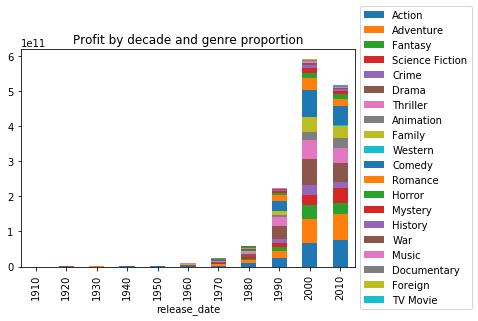

In [231]:
output = {}
for genre in mov3['genre'].unique():
    grouped_by_decade = mov3.where(mov3['genre']==genre).groupby((mov3.index.year//10)*10).sum()
    output[genre] = grouped_by_decade['revenue']
    

print(pd.DataFrame(data=output))

f = plt.figure()

plt.title('Profit by decade and genre proportion', color='black')
pd.DataFrame(data=output).plot(kind='bar',  stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<a id='conclusions'></a>
## Conclusions

My conclusions about this project are the next ones:

1. Profit by genre:
>    The most profitable genres according to their profit ratio are the following​: TV Movie, Animation and in the third place, we have a large amount of genres that have the same ratio as it follows: Animation, Comedy, Documentary, Drama, Family, Thriller, Foreign, Horror, Music and Romance
    
2. Earnings over time of the film industry
>   In the analysis we can see that over time, the amount collected by the film industry has been increasing and that within the available data, it can be seen that the decade with the most sales has been the 2000's
   
3. Profit by decade and genre proportion
>    Within the graph that we have inside, you can see that the genres that generate the most sales are: Action, War, Comedy, etc.


